<a href="https://colab.research.google.com/github/maxwellfundi/advanced_deep_learning/blob/main/J_Njiru_Ex5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models, Input
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
#mnist dataset
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = tf.keras.datasets.mnist.load_data()
x_train_mnist, x_train_mnist.reshape(-1, 28,28,1).astype('float32')/255.0
x_test_mnist, x_test_mnist.reshape(-1, 28,28,1).astype('float32')/255.0

y_train_mnist = tf.keras.utils.to_categorical(y_train_mnist, num_classes=10)
y_test_mnist = tf.keras.utils.to_categorical(y_test_mnist, num_classes=10)

#CIFAR10
(x_train_cifar, y_train_cifar),(x_test_cifar, y_test_cifar) = tf.keras.datasets.cifar10.load_data()
x_train_cifar, x_train_cifar.reshape(-1, 32,32,3).astype('float32')/255.0
x_test_cifar, x_test_cifar.reshape(-1, 32,32,3).astype('float32')/255.0

y_train_cifar = tf.keras.utils.to_categorical(y_train_cifar, num_classes=10)
y_test_cifar = tf.keras.utils.to_categorical(y_test_cifar, num_classes=10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [3]:
def create_model(activation, input_shape):
  inputs = Input(shape=input_shape)
  x = layers.Conv2D(32, (3,3), activation=activation)(inputs)
  x = layers.MaxPooling2D((2,2))(x)
  x = layers.Conv2D(64, (3,3), activation=activation)(x)
  x = layers.MaxPooling2D((2,2))(x)
  x = layers.Conv2D(64, (3,3), activation=activation)(x)
  x = layers.Flatten()(x)
  x = layers.Dense(64, activation=activation)(x)
  outputs = layers.Dense(10, activation='softmax')(x)

  model = models.Model(inputs=inputs, outputs=outputs)
  return model

def train_and_model(model, x_train, y_train, x_test, y_test, epochs =10):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=0)
    return history

In [7]:
model = create_model('relu', (32, 32, 3))
history = train_and_model(model, x_train_cifar, y_train_cifar, x_test_cifar, y_test_cifar)

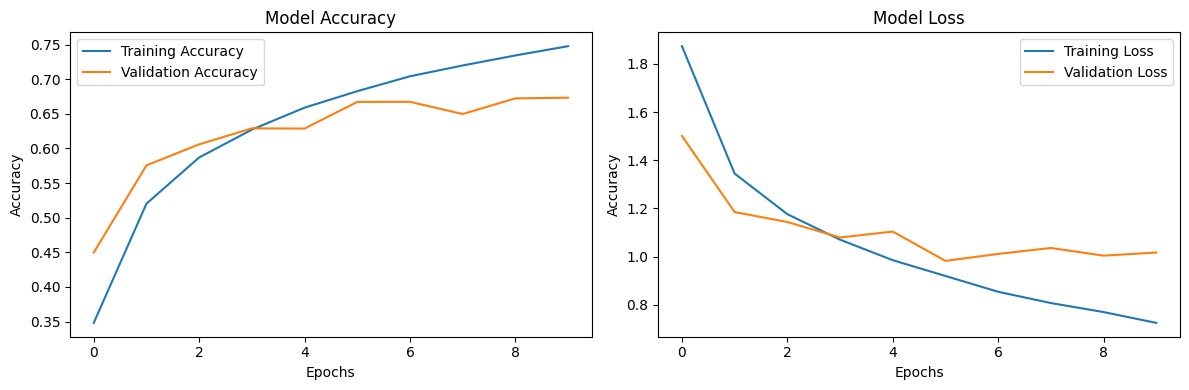

In [8]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

training used 10 epochs we achived
1. validation accuracy of arounf 70%
2. validation loss of about 1


Not great accuracy bit can be imporved with batch normalisation

In [9]:
def test_augmentation(image_path, model):
  img = load_img(image_path, target_size=(32, 32))
  img_array = img_to_array(img)
  img_array = img_array.astype('float32') / 255.0

  original_img = img_array
  horizontal_flip =tf.image.flip_left_right(img_array)
  vertical_flip = tf.image.flip_up_down(img_array)

  plt.figure(figsize=(15, 5))
  images = [original_img, horizontal_flip, vertical_flip]
  titles = ['Original', 'Horizontal Flip', 'Vertical Flip']

  for i, (image, title) in enumerate(zip(images, titles)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

  plt.tight_layout()
  plt.show()

#prediction
  class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
  for image, title in zip(images, titles):
    pred = model.predict(np.expand_dims(image, axis=0))
    predicted_class = class_names[np.argmax(pred)]
    confidence = np.max(pred) * 100
    print(f"\n {title}:")
    print(f"Predicted Class: {predicted_class}")
    print(f"Confidence: {confidence:.2f}%")



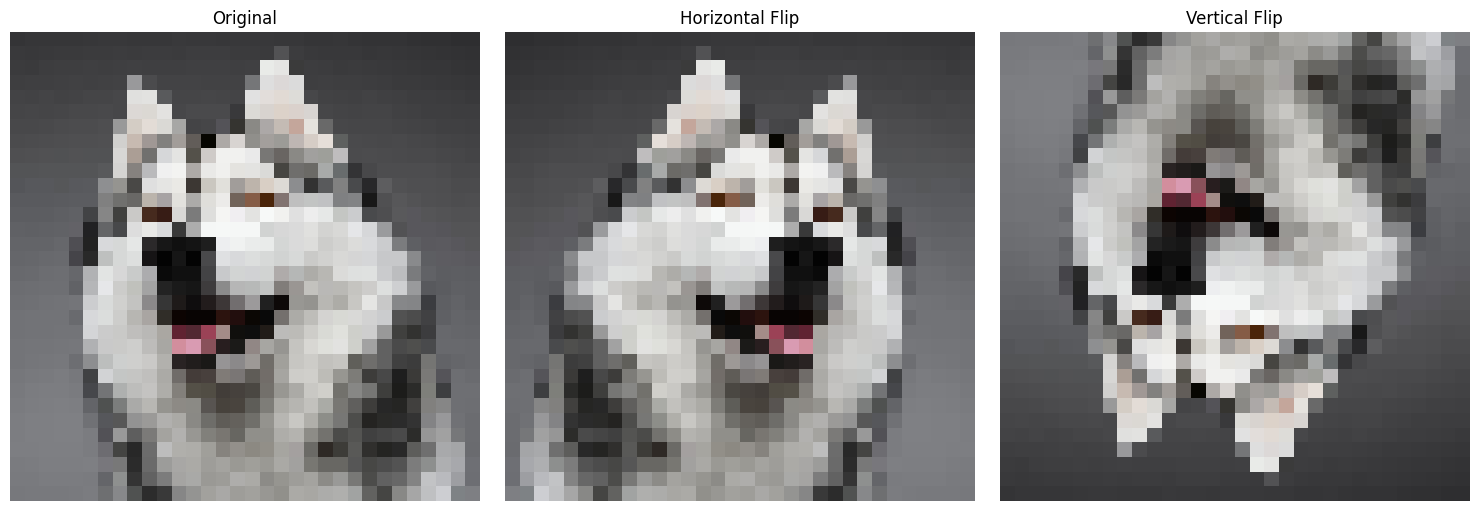

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

 Original:
Predicted Class: deer
Confidence: 33.56%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

 Horizontal Flip:
Predicted Class: deer
Confidence: 33.36%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

 Vertical Flip:
Predicted Class: deer
Confidence: 32.69%


In [18]:
test_augmentation('dog.jpg', model)

The model seem not to predict this correctly, Doesnt seem to generallise very well and cant make good prediction on the augmneted images

**Task 2**

In [11]:
mnist_model = create_model('relu', (28, 28, 1))
history_mnist = train_and_model(mnist_model, x_train_mnist, y_train_mnist, x_test_mnist, y_test_mnist)

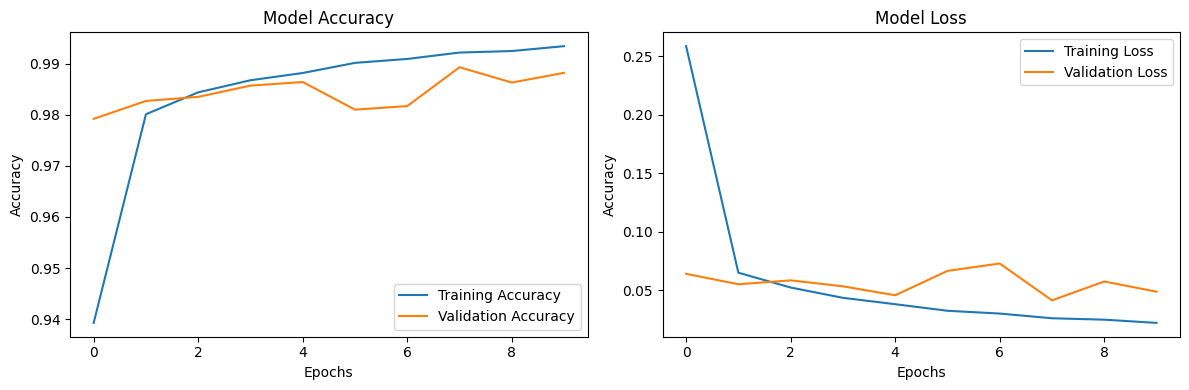

In [12]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_mnist.history['accuracy'], label='Training Accuracy')
plt.plot(history_mnist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_mnist.history['loss'], label='Training Loss')
plt.plot(history_mnist.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

With 10 epochs we had calidation accuracy of over 98%

In [16]:
from scipy.ndimage import rotate

def test_rotation_augmentation(image_path, model):
  img = load_img(image_path, color_mode='grayscale', target_size=(28, 28))
  img_array = img_to_array(img)
  img_array = img_array.astype('float32') / 255.0

  rotation_angles = [0, 15, 30, 45, 60, 90]
  rotated_images = []

  for angle in rotation_angles:
    rotated = rotate(img_array, angle, reshape=False, mode='nearest')
    rotated_images.append(rotated)

  plt.figure(figsize=(15, 5))

  for i, (img, angle) in enumerate(zip(rotated_images, rotation_angles)):
    plt.subplot(1, 6, i + 1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f'Rotated by {angle} degrees')
    plt.axis('off')

  plt.tight_layout()
  plt.show()

  print("Predictions for different images:")

  for angle,img in zip(rotation_angles, rotated_images):
    pred_input = img.reshape(1, 28, 28, 1)
    pred = model.predict(pred_input)
    predicted_class = np.argmax(pred)
    confidence = np.max(pred) * 100
    print(f"\n Image rotated by {angle} degrees:")
    print(f"Predicted Digit: {predicted_class}")
    print(f"Confidence: {confidence:.2f}%")

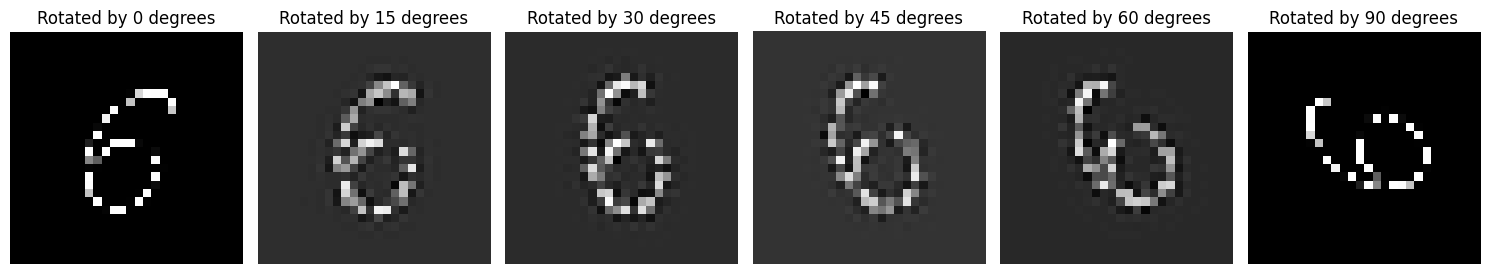

Predictions for different images:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

 Image rotated by 0 degrees:
Predicted Digit: 1
Confidence: 17.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

 Image rotated by 15 degrees:
Predicted Digit: 1
Confidence: 17.56%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

 Image rotated by 30 degrees:
Predicted Digit: 1
Confidence: 16.88%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

 Image rotated by 45 degrees:
Predicted Digit: 1
Confidence: 16.95%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

 Image rotated by 60 degrees:
Predicted Digit: 1
Confidence: 17.46%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

 Image rotated by 90 degrees:
Predicted Digit: 1
Confidence: 16.84%


In [17]:
test_rotation_augmentation('handwritten6.jpg', mnist_model)

The model was not accurate in this case too, and predicted the number as one. I wonder why?